In [1]:
import warnings 
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from scipy import stats
import seaborn as sns
from sklearn.metrics import accuracy_score


In [3]:
bc = pd.read_csv("wisc_bc_data.csv")
bc.head(10)
bc.shape
bc.isnull().values.any()
bc.isnull().sum().sum()
bc.describe()
bc.dtypes


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
5,906539,B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,...,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284
6,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.48,37.16,82.28,474.2,0.1298,0.2517,0.36300,0.09653,0.2112,0.08732
7,87880,M,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,...,19.20,41.85,128.50,1153.0,0.2226,0.5209,0.46460,0.20130,0.4432,0.10860
8,862989,B,10.49,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.01201,...,11.54,23.31,74.22,402.8,0.1219,0.1486,0.07987,0.03203,0.2826,0.07552
9,89827,B,11.06,14.96,71.49,373.9,0.10330,0.09097,0.05397,0.03341,...,11.92,19.90,79.76,440.0,0.1418,0.2210,0.22990,0.10750,0.3301,0.09080


(569, 32)

False

0

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [4]:
bc_o = bc[(np.abs(stats.zscore(bc.select_dtypes(exclude='object'))) < 3).all(axis=1)]
bc_o.shape

(487, 32)

In [5]:
bc_o_feature = bc_o.drop(labels= "diagnosis" , axis = 1)
bc_o_feature.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [6]:
bc_o_feature= bc_o_feature.drop(labels = "id", axis = 1)
bc_o_feature

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.320,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.037000,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.13850,0.12660,0.124200,0.093910,0.2827,0.06771
1,10.600,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.026420,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.12130,0.25150,0.191600,0.079260,0.2940,0.07587
2,11.040,16.83,70.92,373.2,0.10770,0.07804,0.030460,0.024800,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.13690,0.14820,0.106700,0.074310,0.2998,0.07881
3,11.280,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.047960,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.13670,0.18220,0.086690,0.086110,0.2102,0.06784
4,15.190,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.026570,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.11260,0.17370,0.136200,0.081780,0.2487,0.06766
5,11.570,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,0.2031,0.06267,...,13.07,26.98,86.43,520.5,0.12490,0.19370,0.256000,0.066640,0.3035,0.08284
8,10.490,19.29,67.41,336.1,0.09989,0.08578,0.029950,0.012010,0.2217,0.06481,...,11.54,23.31,74.22,402.8,0.12190,0.14860,0.079870,0.032030,0.2826,0.07552
9,11.060,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.033410,0.1776,0.06907,...,11.92,19.90,79.76,440.0,0.14180,0.22100,0.229900,0.107500,0.3301,0.09080
10,20.590,21.24,137.80,1320.0,0.10850,0.16440,0.218800,0.112100,0.1848,0.06222,...,23.86,30.76,163.20,1760.0,0.14640,0.35970,0.517900,0.211300,0.2480,0.08999
11,12.250,17.94,78.27,460.3,0.08654,0.06679,0.038850,0.023310,0.1970,0.06228,...,13.59,25.22,86.60,564.2,0.12170,0.17880,0.194300,0.082110,0.3113,0.08132


In [7]:

bc_o['diagnosis'] = bc_o.diagnosis.astype('category')
bc_o.dtypes
def category_to_numeric(x):
   if x=='B':
       return 0
   if x=='M':
       return 1
    
    
bc_o['diagnosis'] = bc_o['diagnosis'].apply(category_to_numeric)
bc_o



id                      int64
diagnosis            category
radius_mean           float64
texture_mean          float64
perimeter_mean        float64
area_mean             float64
smoothness_mean       float64
compactness_mean      float64
concavity_mean        float64
points_mean           float64
symmetry_mean         float64
dimension_mean        float64
radius_se             float64
texture_se            float64
perimeter_se          float64
area_se               float64
smoothness_se         float64
compactness_se        float64
concavity_se          float64
points_se             float64
symmetry_se           float64
dimension_se          float64
radius_worst          float64
texture_worst         float64
perimeter_worst       float64
area_worst            float64
smoothness_worst      float64
compactness_worst     float64
concavity_worst       float64
points_worst          float64
symmetry_worst        float64
dimension_worst       float64
dtype: object

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,0,12.320,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.037000,...,13.50,15.64,86.97,549.1,0.13850,0.12660,0.124200,0.093910,0.2827,0.06771
1,8910251,0,10.600,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.026420,...,11.88,22.94,78.28,424.8,0.12130,0.25150,0.191600,0.079260,0.2940,0.07587
2,905520,0,11.040,16.83,70.92,373.2,0.10770,0.07804,0.030460,0.024800,...,12.41,26.44,79.93,471.4,0.13690,0.14820,0.106700,0.074310,0.2998,0.07881
3,868871,0,11.280,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.047960,...,11.92,15.77,76.53,434.0,0.13670,0.18220,0.086690,0.086110,0.2102,0.06784
4,9012568,0,15.190,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.026570,...,16.20,15.73,104.50,819.1,0.11260,0.17370,0.136200,0.081780,0.2487,0.06766
5,906539,0,11.570,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,...,13.07,26.98,86.43,520.5,0.12490,0.19370,0.256000,0.066640,0.3035,0.08284
8,862989,0,10.490,19.29,67.41,336.1,0.09989,0.08578,0.029950,0.012010,...,11.54,23.31,74.22,402.8,0.12190,0.14860,0.079870,0.032030,0.2826,0.07552
9,89827,0,11.060,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.033410,...,11.92,19.90,79.76,440.0,0.14180,0.22100,0.229900,0.107500,0.3301,0.09080
10,91485,1,20.590,21.24,137.80,1320.0,0.10850,0.16440,0.218800,0.112100,...,23.86,30.76,163.20,1760.0,0.14640,0.35970,0.517900,0.211300,0.2480,0.08999
11,8711003,0,12.250,17.94,78.27,460.3,0.08654,0.06679,0.038850,0.023310,...,13.59,25.22,86.60,564.2,0.12170,0.17880,0.194300,0.082110,0.3113,0.08132


In [8]:
bc_o_feature.var() > 0.1

bc_o_feature=bc_o_feature.loc[:, bc_o_feature.var() > 0.1]
bc_o_feature.shape

radius_mean           True
texture_mean          True
perimeter_mean        True
area_mean             True
smoothness_mean      False
compactness_mean     False
concavity_mean       False
points_mean          False
symmetry_mean        False
dimension_mean       False
radius_se            False
texture_se            True
perimeter_se          True
area_se               True
smoothness_se        False
compactness_se       False
concavity_se         False
points_se            False
symmetry_se          False
dimension_se         False
radius_worst          True
texture_worst         True
perimeter_worst       True
area_worst            True
smoothness_worst     False
compactness_worst    False
concavity_worst      False
points_worst         False
symmetry_worst       False
dimension_worst      False
dtype: bool

(487, 11)

In [9]:
bc_o_pp=bc_o.drop(labels = "id", axis = 1)

bc_o_pp=bc_o_pp.loc[:, bc_o_pp.var() > 0.1]


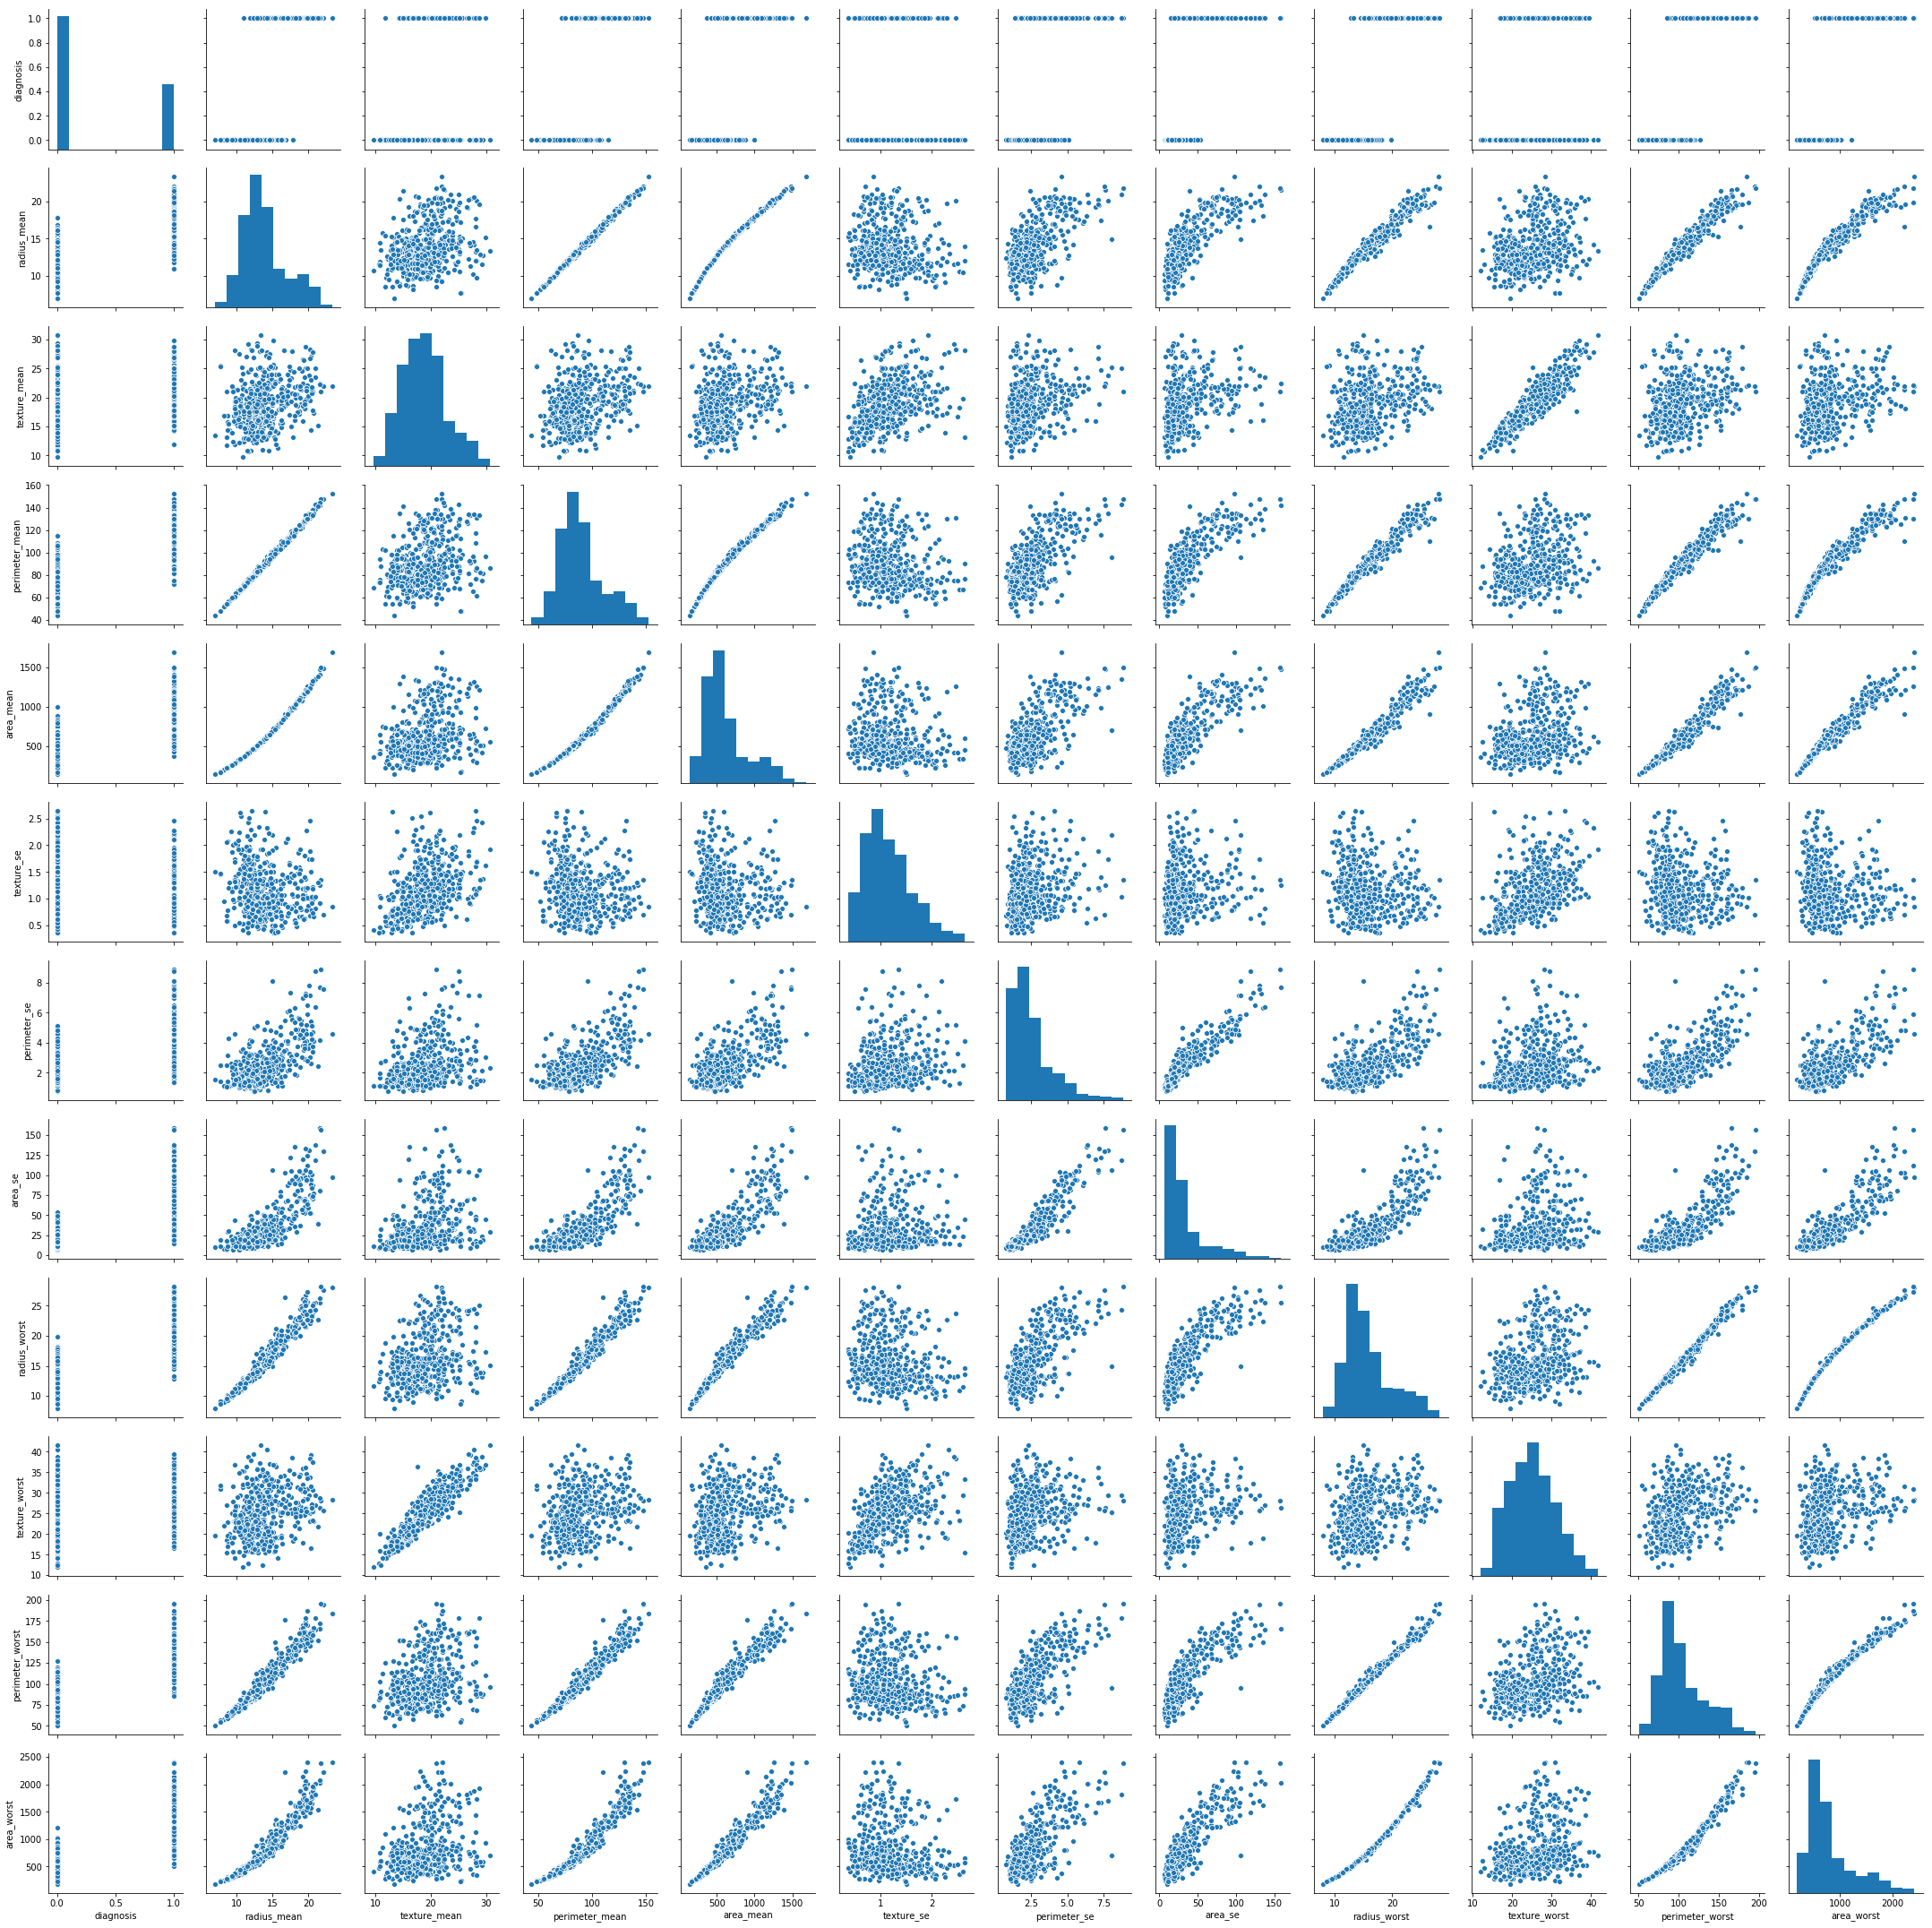

In [10]:
import seaborn as sns

sns.pairplot(bc_o_pp)

In [11]:
bc_o_feature_z = bc_o_feature.apply(zscore)  
bc_o_feature_z.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,texture_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst
count,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02
mean,-3.957592e-16,5.035899e-16,1.668754e-16,-4.778290e-16,3.693144e-16,4.157922e-16,-1.783310e-16,2.329873e-16,-3.907438e-16,-2.516809e-16,8.434959e-17
std,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00
min,-2.276447e+00,-2.304567e+00,-2.230889e+00,-1.679399e+00,-1.713130e+00,-1.275482e+00,-9.970823e-01,-1.923607e+00,-2.309196e+00,-1.899408e+00,-1.408563e+00
25%,-6.983897e-01,-7.386892e-01,-6.958650e-01,-6.897156e-01,-7.421278e-01,-7.092098e-01,-6.053523e-01,-6.742341e-01,-7.687740e-01,-6.887691e-01,-6.690258e-01
50%,-2.031764e-01,-7.155459e-02,-2.009849e-01,-2.787841e-01,-1.877945e-01,-2.779858e-01,-3.963905e-01,-2.488379e-01,5.400211e-03,-2.565252e-01,-3.284978e-01
75%,4.709099e-01,6.534823e-01,4.971278e-01,3.369096e-01,5.902172e-01,3.443772e-01,2.108130e-01,4.630000e-01,6.641970e-01,4.855826e-01,3.248214e-01
max,3.119224e+00,2.984677e+00,3.016341e+00,3.747501e+00,3.220329e+00,4.519425e+00,4.591103e+00,3.015377e+00,2.903049e+00,3.276491e+00,3.532379e+00


In [12]:
# store the normalized features data into np array 

X = np.array(bc_o_feature_z)
X.shape

bc_o_labels = bc_o["diagnosis"]

y = np.array(bc_o_labels)
y.shape


(487, 11)

(487,)

In [13]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [14]:

NNH = KNeighborsClassifier(n_neighbors=3)
NNH.fit(X_train, y_train)
NNH.score(X_test, y_test)

predicted_labels = NNH.predict(X_test)

from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels))


accuracy_score(y_test, predicted_labels, normalize=False)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

0.9251700680272109

[[94  2]
 [ 9 42]]


136

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,50))


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

0.038235294117647145

2

The optimal number of neighbors is 3


(0, 25)

Text(0.5,0,'Number of Neighbors K')

Text(0,0.5,'Misclassification Error')

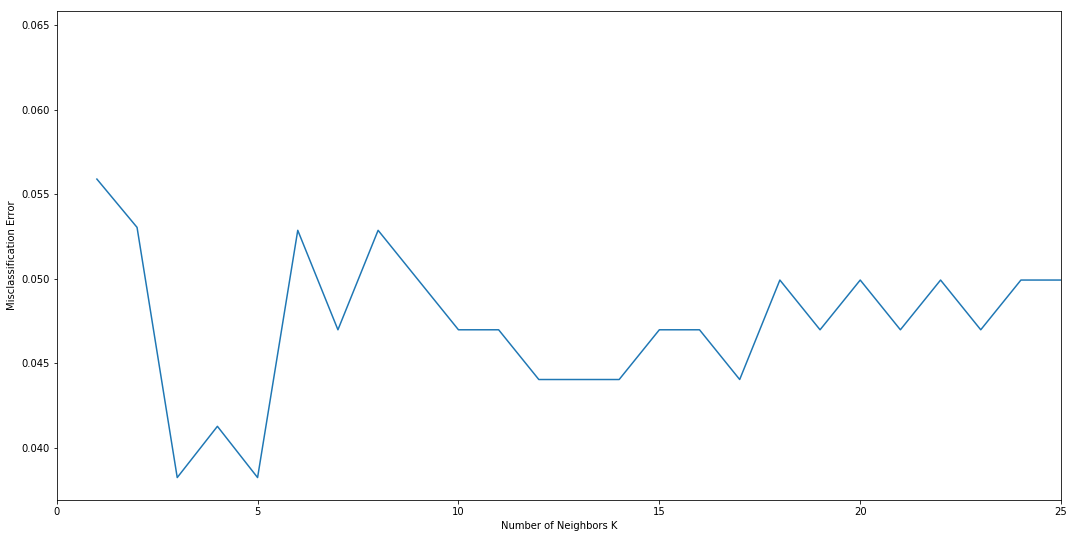

In [16]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
